In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd

In [2]:
audio_path = '16_44k_PerfectTest.wav'
y, sr = librosa.load(audio_path, sr=None)  # sr=None для збереження оригінальної частоти дискретизації

In [16]:
# Характеристики та числові дані(семпли)
print("Частота дискретизації (sample rate):", sr, "Hz")
print("Кількість каналів:", "Стерео" if len(y.shape) > 1 and y.shape[1] == 2 else "Моно")
print("Кількість біт на число (припускаємо 16-бітний файл): 16")
duration = len(y) / sr
print("Тривалість звукового фрагменту:", duration, "секунд")
print("Кількість семплів:", len(y))

Частота дискретизації (sample rate): 44100 Hz
Кількість каналів: Моно
Кількість біт на число (припускаємо 16-бітний файл): 16
Тривалість звукового фрагменту: 14.359909297052154 секунд
Кількість семплів: 633272


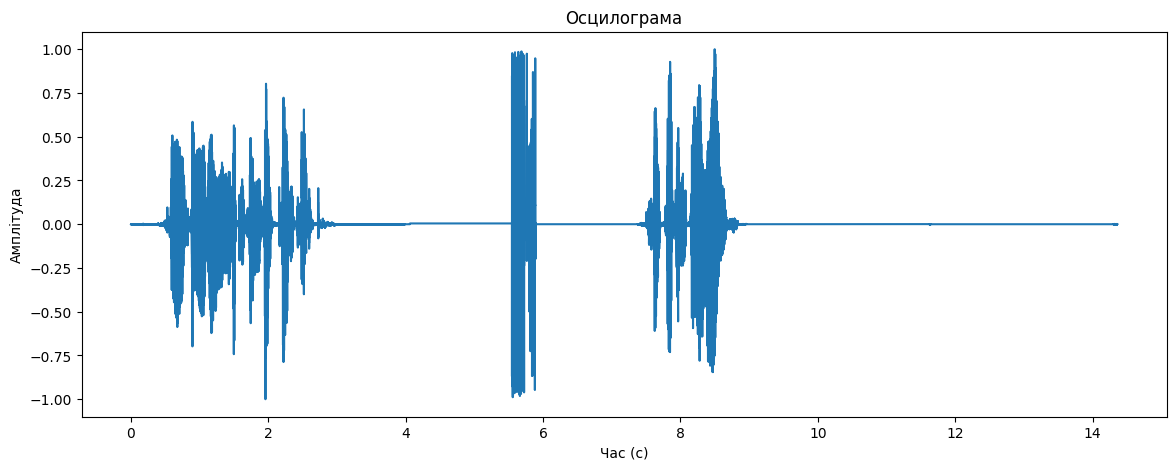

In [5]:
plt.figure(figsize=(14, 5))
plt.plot(np.arange(len(y)) / sr, y)
plt.title("Осцилограма")
plt.xlabel("Час (с)")
plt.ylabel("Амплітуда")
plt.show()

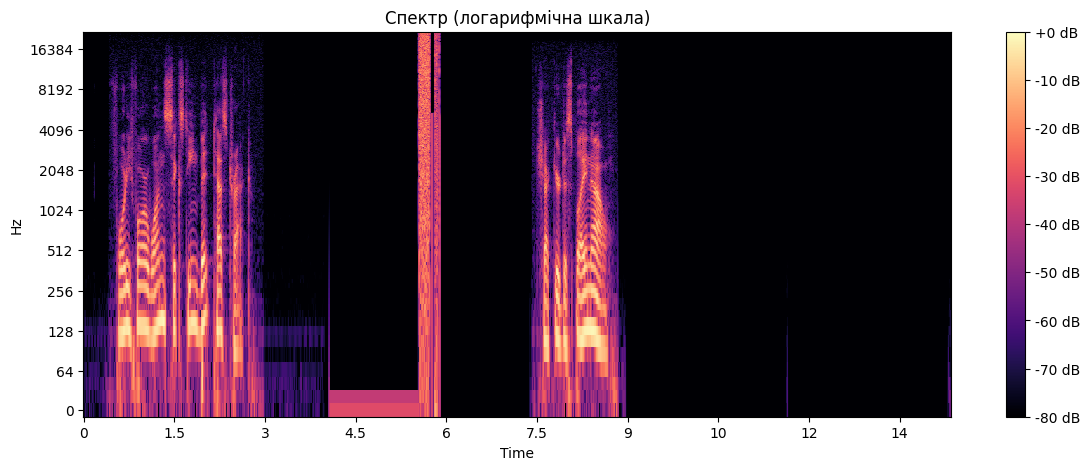

In [6]:
D = np.abs(librosa.stft(y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format="%+2.0f dB")
plt.title("Спектр (логарифмічна шкала)")
plt.show()

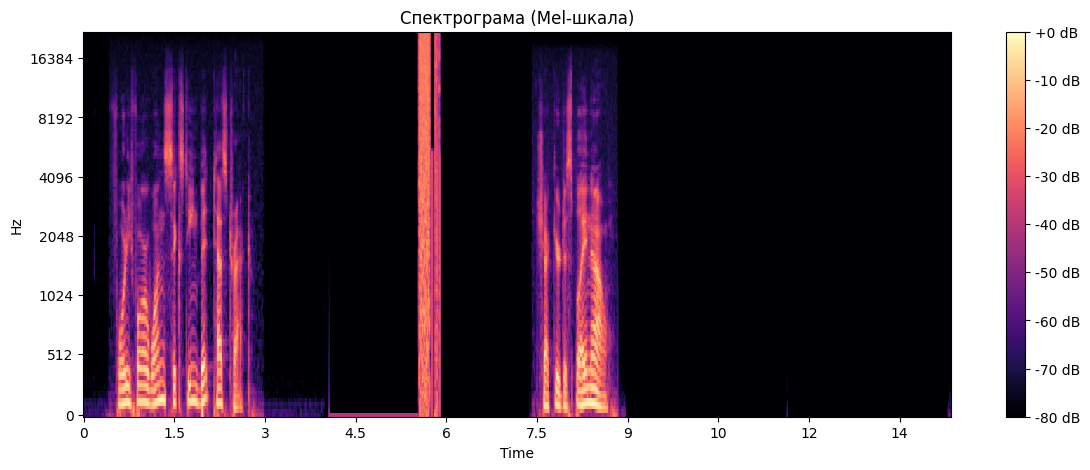

In [7]:
plt.figure(figsize=(14, 5))
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format="%+2.0f dB")
plt.title("Спектрограма (Mel-шкала)")
plt.show()

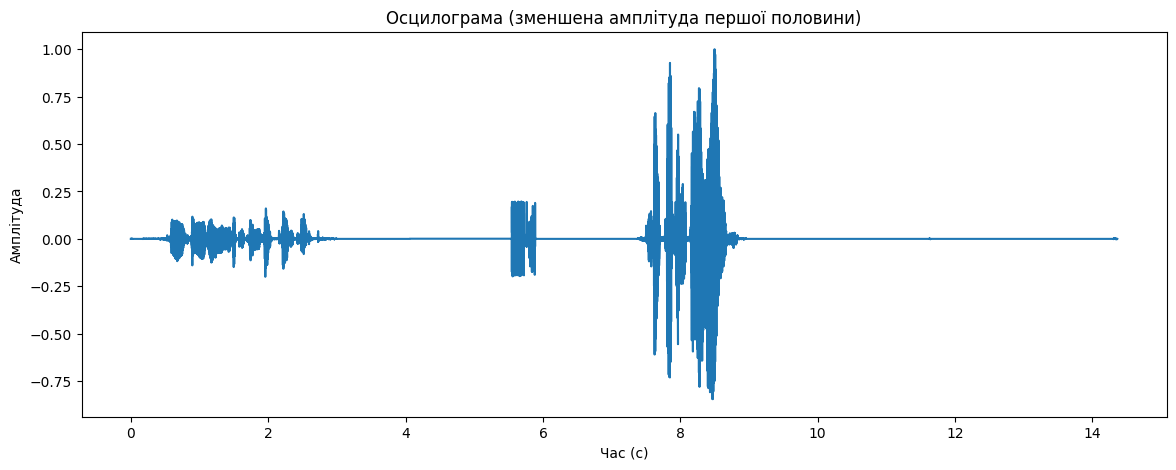

In [17]:
# Міняємо амплітуду першої половини і перевіряємо діапазон
half = len(y) // 2
y_modified = y.copy()
y_modified[:half] *= 0.2

if np.max(np.abs(y_modified)) > 1.0:
    y_modified = np.clip(y_modified, -1.0, 1.0)

plt.figure(figsize=(14, 5))
plt.plot(np.arange(len(y_modified)) / sr, y_modified)
plt.title("Осцилограма (зменшена амплітуда першої половини)")
plt.xlabel("Час (с)")
plt.ylabel("Амплітуда")
plt.show()

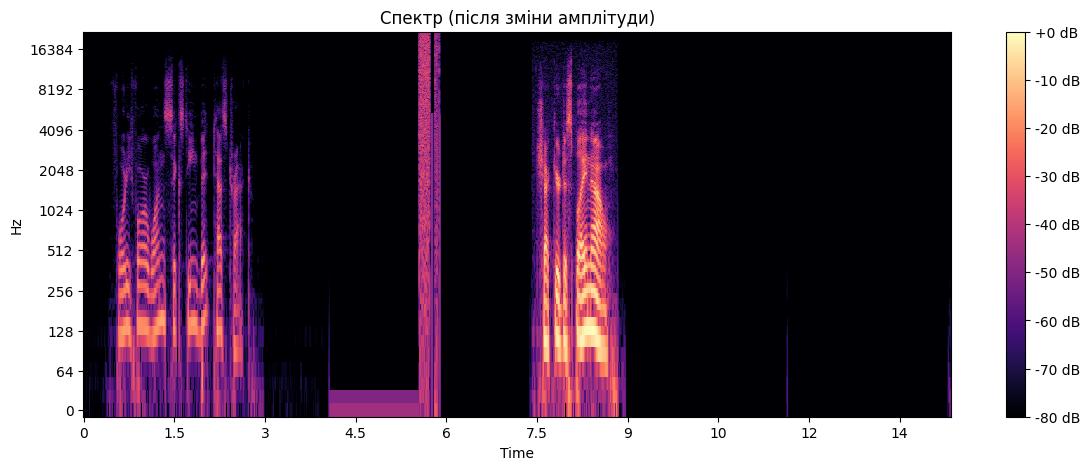

In [10]:
D_modified = np.abs(librosa.stft(y_modified))
plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.amplitude_to_db(D_modified, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format="%+2.0f dB")
plt.title("Спектр (після зміни амплітуди)")
plt.show()

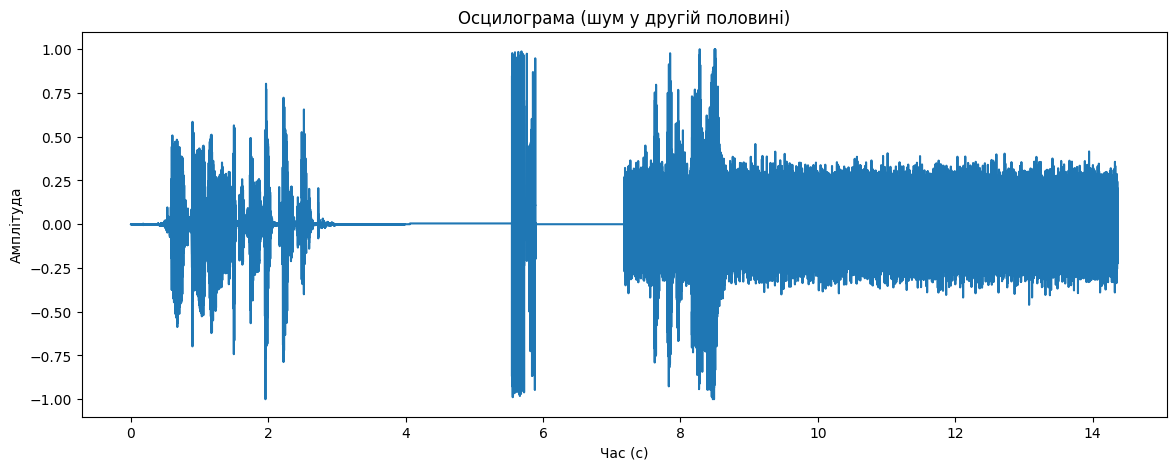

In [18]:
# Додаємо шум до другої половини та перевіряємо діапазон
noise = np.random.normal(0, 0.1, len(y) - half)
y_noisy = y.copy()
y_noisy[half:] += noise

y_noisy = np.clip(y_noisy, -1.0, 1.0)

plt.figure(figsize=(14, 5))
plt.plot(np.arange(len(y_noisy)) / sr, y_noisy)
plt.title("Осцилограма (шум у другій половині)")
plt.xlabel("Час (с)")
plt.ylabel("Амплітуда")
plt.show()

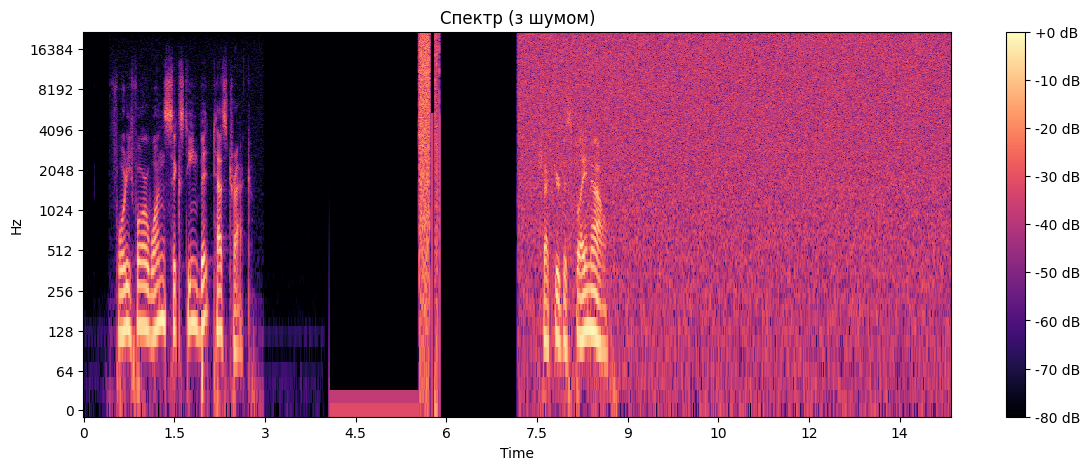

In [13]:
D_noisy = np.abs(librosa.stft(y_noisy))
plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.amplitude_to_db(D_noisy, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format="%+2.0f dB")
plt.title("Спектр (з шумом)")
plt.show()

In [14]:
print("Найінформативнішим є спектрограма, оскільки вона відображає частотний склад сигналу у часі.")

Найінформативнішим є спектрограма, оскільки вона відображає частотний склад сигналу у часі.


In [20]:
print("1. Частота дискретизації — кількість семплів за секунду (Гц).")
print("2. Кількість каналів — моно (1) або стерео (2).")
print("3. Біт на число — роздільна здатність амплітуди (наприклад, 16 біт).")
print("4. Бітрейд — кількість бітів за секунду (наприклад, 1411 кбіт/с для CD).")
print("5. По осях графіків: час (X), амплітуда (Y) для осцилограми; частота (Y) для спектра.")
print("6. Спектр показує частотний склад, спектрограма — його зміну у часі.")
print("7. Осцилограма корисна для аналізу форми хвилі, спектр — для частот.")

1. Частота дискретизації — кількість семплів за секунду (Гц).
2. Кількість каналів — моно (1) або стерео (2).
3. Біт на число — роздільна здатність амплітуди (наприклад, 16 біт).
4. Бітрейд — кількість бітів за секунду (наприклад, 1411 кбіт/с для CD).
5. По осях графіків: час (X), амплітуда (Y) для осцилограми; частота (Y) для спектра.
6. Спектр показує частотний склад, спектрограма — його зміну у часі.
7. Осцилограма корисна для аналізу форми хвилі, спектр — для частот.
